In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# Requires-Python: >=3.10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Basic setting
SCATTERP_SIZE_DEFAULT = 50
ALPHA_DEFAULT = 0.7
# ---- Global style knobs (safe to tweak) ----
plt.rcParams.update({
    "figure.dpi": 160,
    "savefig.dpi": 160,
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})


In [5]:
# Colors
blue_colors = [
    "#0B3C8C",  # Navy Blue（深海军蓝）
    "#154FA6",
    "#1E63C0",
    "#2A78DA",
    "#3A8DF0",
    "#62A9F7",
    "#8BC3FB",
    "#B5DAFE",
    "#D7EBFF",
]
teal_colors = [
    "#005A55",  # Deep Teal
    "#00756E",
    "#009088",
    "#00ABA2",
    "#27C2B7",
    "#55D6CA",
    "#87E6DA",
    "#B6F2EA",
    "#DDFBF6",
]
green_colors = [
    "#0A4E1F",  # Forest Green / Deep Forest Green
    "#146A2D",
    "#20863B",
    "#2DA34A",
    "#52BB6A",
    "#7DD897",
    "#A7E8B8",
    "#CFF5D9",
    "#E8FDF0",
]
orange_colors = [
    "#7A3C00",  # Burnt Orange
    "#9B5200",
    "#BC6800",
    "#D77F00",
    "#F19626",
    "#F7B86C",
    "#F9D3A2",
    "#FBE8CE",
    "#FEF6E8",
]
BLUE_COLOR_ORIGINAL = "#1f77b4"
BLUE_COLOR_DEFAULT = blue_colors[3]
TEAL_COLOR_DEFAULT = teal_colors[3]
ORANGE_COLOR_DEFAULT = orange_colors[2]
PINK_COLOR_DEFAULT = "#f700ff"
GRAY_COLOR_DEFAULT = "#cccccc"

In [6]:
# Read data from bug_csv_v2.csv (without added source/sink connector information)
df = pd.read_csv("bug_csv_v2.csv")

# Finding 5: Comment Count vs Comment Chars
# Fig 5
df_f5_copy = df.dropna(subset=["tool_total_comments_count", "tool_total_chars"]).copy()
df_f5_copy["tool_total_comments_count"] = df_f5_copy[
    "tool_total_comments_count"
].astype(float)
df_f5_copy["tool_total_chars"] = df_f5_copy["tool_total_chars"].astype(float)

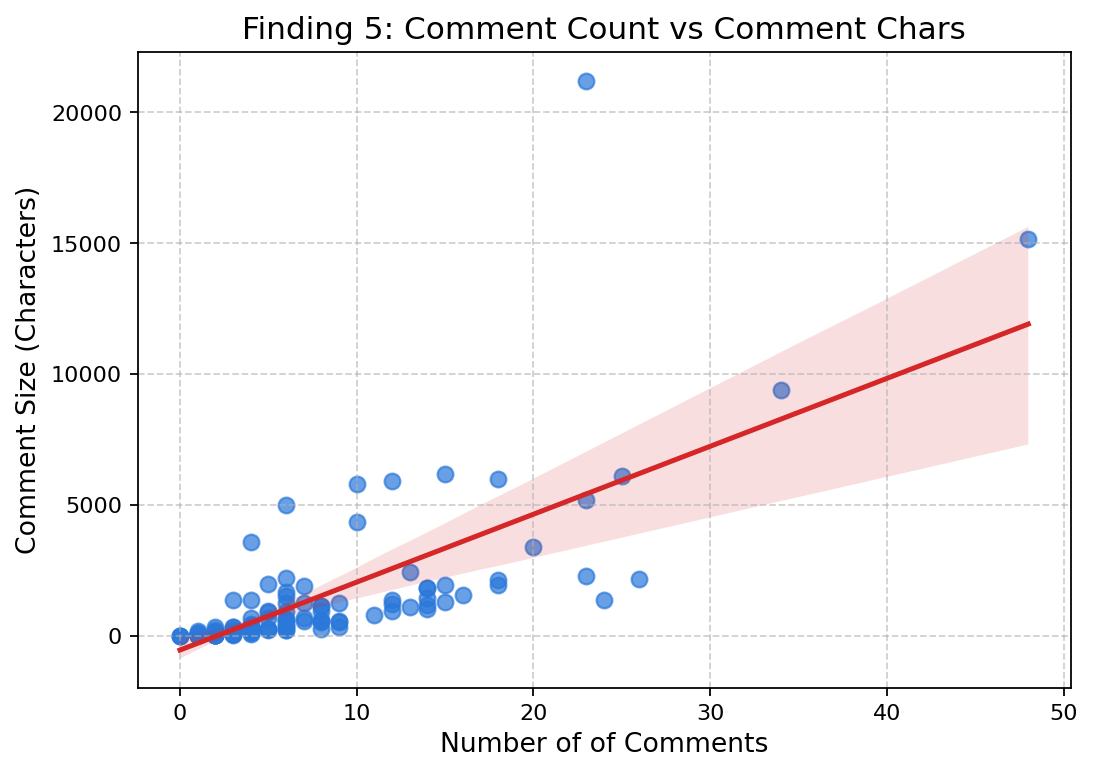

In [7]:
fig5_1, ax5_1 = plt.subplots(figsize=(7, 5))
# linear regression line and its confidence interval (95% confidence band).
# y = β0 + β1 * x
sns.regplot(
    data=df_f5_copy,
    x="tool_total_comments_count",
    y="tool_total_chars",
    scatter_kws={"alpha": 0.7, "s": SCATTERP_SIZE_DEFAULT},
    line_kws={"color": "#d62728"},
    ax=ax5_1,
    color= BLUE_COLOR_DEFAULT,
)
ax5_1.set_title("Finding 5: Comment Count vs Comment Chars", fontsize=14)
ax5_1.set_xlabel("Number of of Comments")
ax5_1.set_ylabel("Comment Size (Characters)")
ax5_1.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

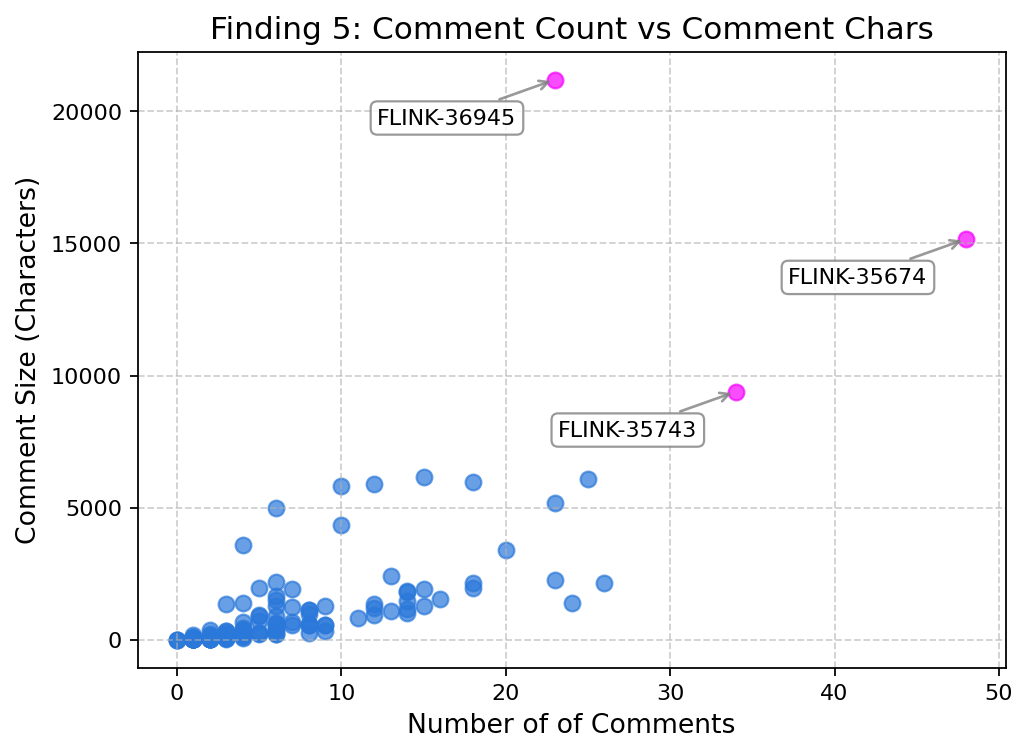

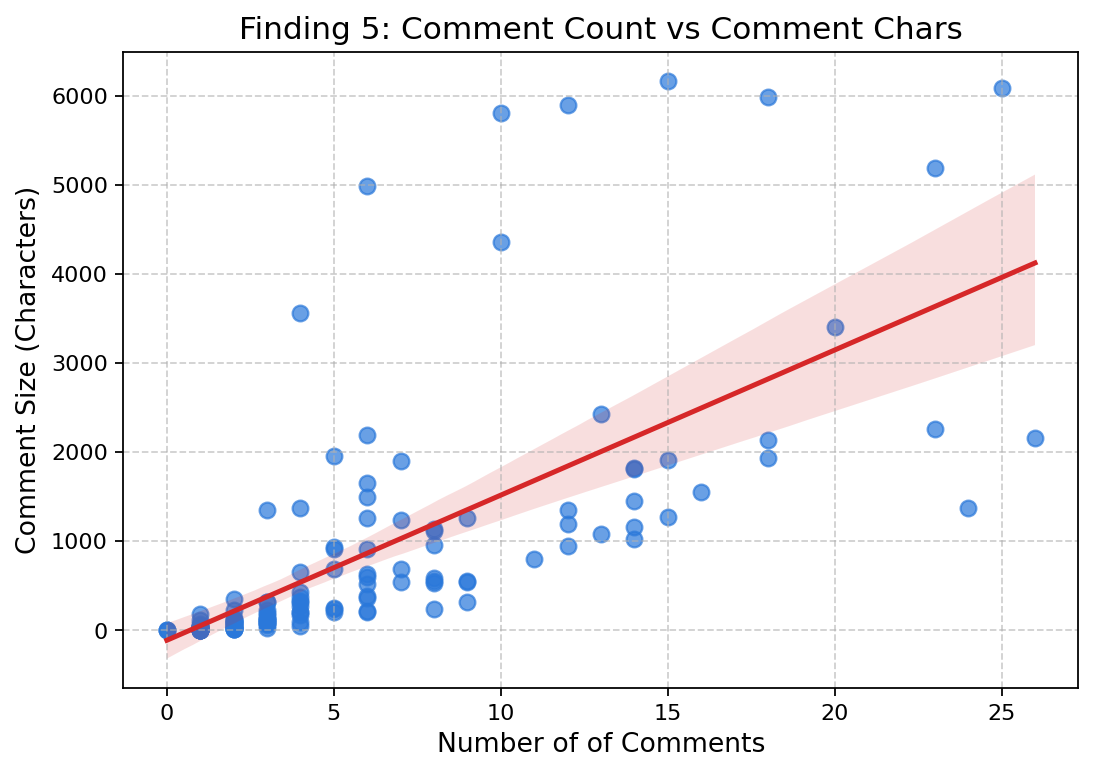

In [8]:

count_threshold = 30
chars_threshold = 20000
df_f5_copy_main = df_f5_copy[
    (df_f5_copy["tool_total_comments_count"] <= count_threshold)
    & (df_f5_copy["tool_total_chars"] <= chars_threshold)
]
df_f5_copy_outliers = df_f5_copy[
    (df_f5_copy["tool_total_comments_count"] > count_threshold)
    | (df_f5_copy["tool_total_chars"] > chars_threshold)
]
fig5_2, ax5_2 = plt.subplots(figsize=(7,5))
# Main
ax5_2.scatter(
    x=df_f5_copy_main["tool_total_comments_count"],
    y=df_f5_copy_main["tool_total_chars"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=BLUE_COLOR_DEFAULT,
)
ax5_2.scatter(
    x=df_f5_copy_outliers["tool_total_comments_count"],
    y=df_f5_copy_outliers["tool_total_chars"],
    s=SCATTERP_SIZE_DEFAULT,
    alpha=0.7,
    color=PINK_COLOR_DEFAULT,
)
# Annotation + annotation arrowprops
for i, row in df_f5_copy_outliers.iterrows():
  ax5_2.annotate(
    text=row["Bug编号"],
    xy=(
            row["tool_total_comments_count"],
            row["tool_total_chars"]
        ),                     # ← outlier 点坐标
        xytext=(-80, -20),       # ← 标签相对偏移（像素）
        textcoords='offset points',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
        arrowprops=dict(
            arrowstyle="->",
            color="gray",
            lw=1.2,
            alpha=0.8
        )
  )

# Purple
# sns.scatterplot(
#     data=df_f5_copy_outliers,
#     x="tool_total_comments_count",
#     y="tool_total_chars",
#     color="#f700ff",
#     s=SCATTERP_SIZE_DEFAULT*1.5,
#     alpha=0.7,
#     ax=ax5_2,
#     ="Outliers"
# )
# ax5_2.set_title("Finding 5: Comment Count vs Comment Chars", fontsize=14)
ax5_2.set_title("Finding 5: Comment Count vs Comment Chars")
ax5_2.set_xlabel("Number of of Comments")
ax5_2.set_ylabel("Comment Size (Characters)")
ax5_2.grid(True, linestyle="--", alpha=0.6)
# ax5_2.legend()
plt.show()


fig5_3, ax5_3 = plt.subplots(figsize=(7, 5))
sns.regplot(
    data=df_f5_copy_main,
    x="tool_total_comments_count",
    y="tool_total_chars",
    scatter_kws={"alpha": 0.7, "s": SCATTERP_SIZE_DEFAULT},
    line_kws={"color": "#d62728"},
    ax=ax5_3,
    color= BLUE_COLOR_DEFAULT,
)

# ax5_3.set_title("Finding 5: Comment Count vs Comment Chars", fontsize=14)
ax5_3.set_title("Finding 5: Comment Count vs Comment Chars")
ax5_3.set_xlabel("Number of of Comments")
ax5_3.set_ylabel("Comment Size (Characters)")
ax5_3.grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


In [9]:
# Finding 1: Distribution of CDC
import pandas as pd
import re
from collections import Counter


def split_multi_values(val, sep=r";"):
    """Split fields like 'MySQL; PostgreSQL' into ['MySQL', 'PostgreSQL']."""
    if pd.isna(val):
        return []
    s = str(val)
    return [p.strip() for p in re.split(sep, s) if p.strip()]


def aggregate_components(df, column_names: list[str]):
    """Aggregate multi columns and return frequency dict."""
    counter = Counter()

    for _, row in df.iterrows():
        merged = []
        for c in column_names:
            l = split_multi_values(row.get(c), sep=r"[;；,]")
            merged += l
        for item in merged:
            counter[item] += 1
    return dict(counter.most_common())


df = pd.read_csv("bug_resolved_csv_v3.csv")
db_counts = aggregate_components(df, ["Source数据库类型", "Sink数据库类型"])
print(db_counts)

{'MySQL': 58, 'Runtime': 36, 'Paimon': 13, 'Doris': 10, 'StarRocks': 9, 'SQL Server': 9, 'Oracle': 8, 'PostgreSQL': 7, 'MongoDB': 6, 'Docs': 6, 'Values': 5, 'Kafka': 5, 'Iceberg': 3, 'DB2': 2, 'Elasticsearch': 2, 'OceanBase': 1, 'MaxCompute': 1}


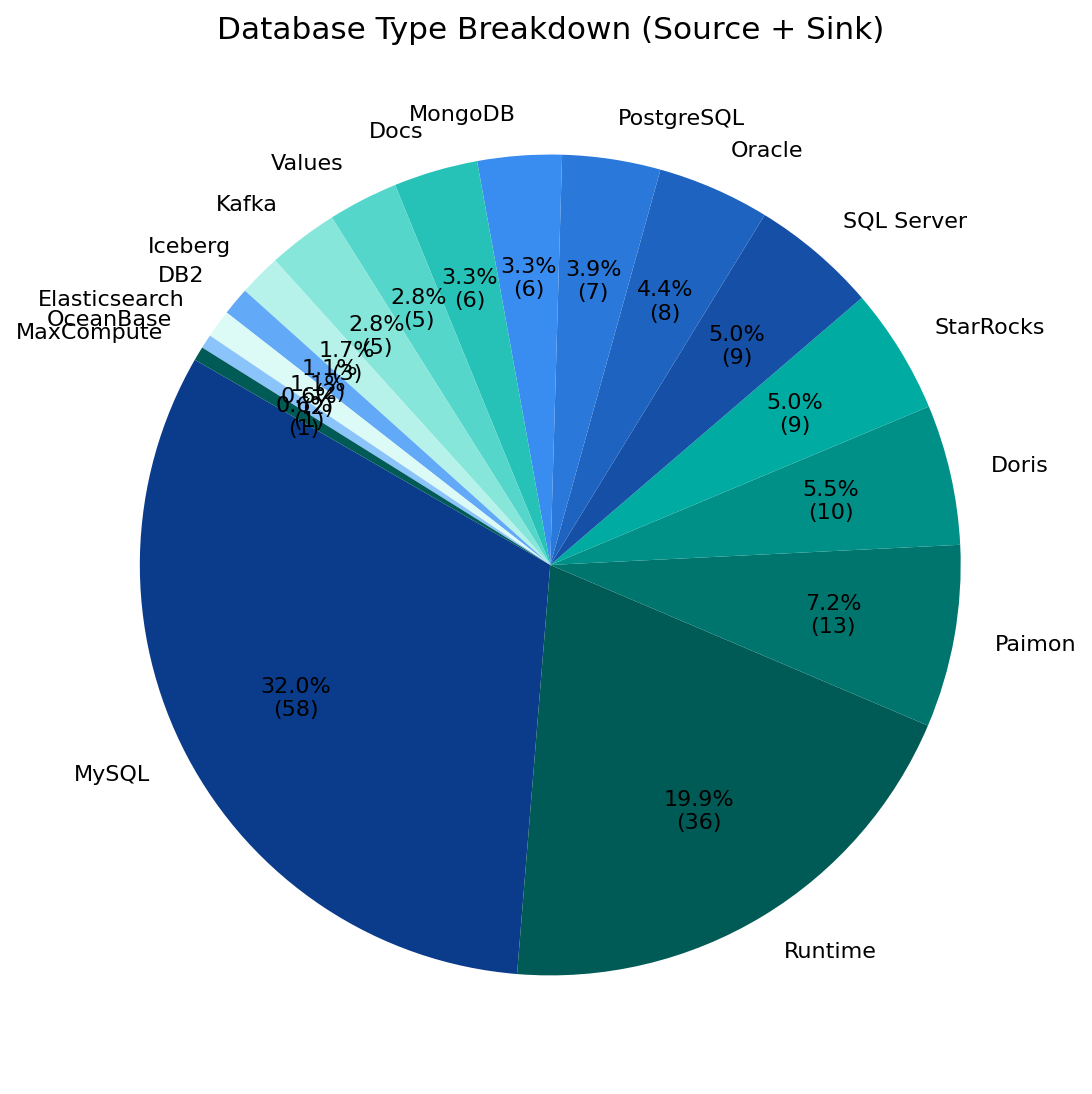

In [10]:
# Finding 1: Distribution of CDC
# Fig 1:
source_set = {"MySQL", "PostgreSQL", "MongoDB", "SQL Server", "Oracle", "DB2", "OceanBase", "Vitness", "TiDB"}
sink_set = {"StarRocks", "Doris", "Kafka", "Paimon", "Iceberg", "Elasticsearch", "Fluss", "MaxCompute", "Values"}

labels = list(db_counts.keys())
values = list(db_counts.values())

# --------------------------
# 2. Distribute colors（Source = Blue Family，Sink = Teal Family）
# --------------------------
colors = []
blue_idx = 0
teal_idx = 0
for lab in labels:
    if lab in source_set:
        colors.append(blue_colors[blue_idx % len(blue_colors)])
        blue_idx += 1
    else:
        colors.append(teal_colors[teal_idx % len(teal_colors)])
        teal_idx += 1

# --------------------------
# 3. Percentage format
# --------------------------
def autopct_fmt(pct, allvals):
    total = sum(allvals)
    count = int(round(pct/100.0 * total))
    return f"{pct:.1f}%\n({count})"

# --------------------------
# 4. Plot Pie
# --------------------------
fig1_1, ax1_1 = plt.subplots(figsize=(8, 7))

ax1_1.pie(
    values,
    labels=labels,
    colors=colors,
    startangle=150,
    autopct=lambda pct: autopct_fmt(pct, values),
    pctdistance=0.70,
    textprops={"fontsize": 10}
)

ax1_1.set_title("Database Type Breakdown (Source + Sink)", fontsize=14)
fig1_1.tight_layout()

plt.show()

['MySQL', 'SQL Server', 'Oracle', 'PostgreSQL', 'MongoDB', 'DB2', 'OceanBase', 'Paimon', 'Doris', 'StarRocks', 'Values', 'Kafka', 'Iceberg', 'Elasticsearch', 'MaxCompute', 'Runtime', 'Docs']
[58, 9, 8, 7, 6, 2, 1, 13, 10, 9, 5, 5, 3, 2, 1, 36, 6]


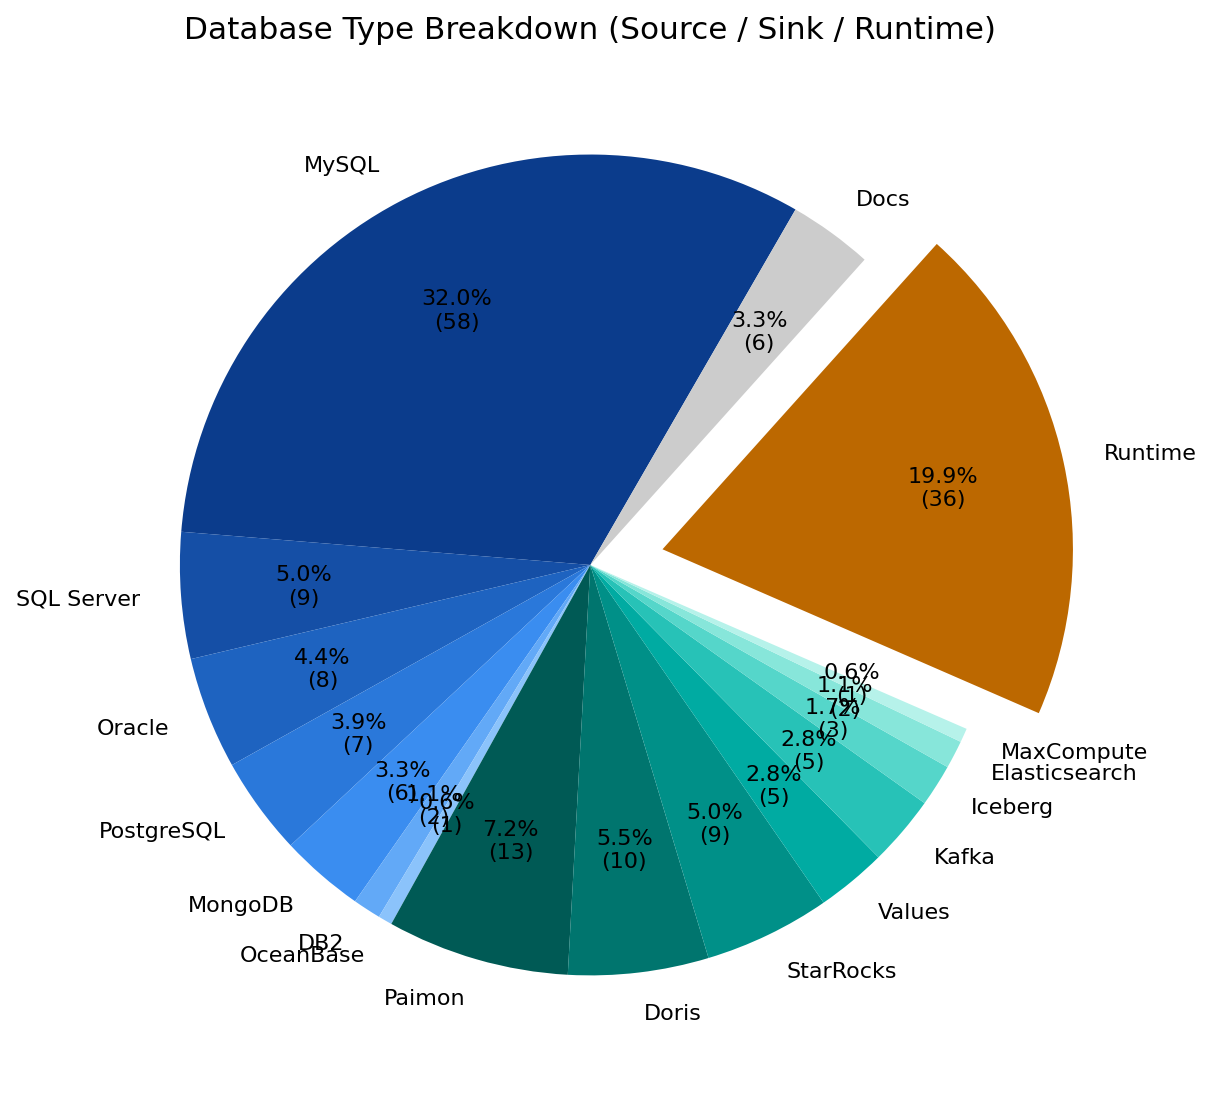

In [11]:
items = list(db_counts.items())
# Re-order as Source -> Sink -> Runtime

reordered_items = []
for k, v in items:
  if k in source_set:
    reordered_items.append((k,v))

for k, v in items:
  if k in sink_set:
    reordered_items.append((k,v))

for k, v in items:
  if k == "Runtime":
    reordered_items.append((k,v))

for k, v in items:
  if k == "Docs":
    reordered_items.append((k,v))

for k, v in items:
    if (k not in source_set) and (k not in sink_set) and (k != "Runtime") and (k != "Docs"):
        print(k,v)
        raise ValueError("Unsupported source/sink database type.")

# Re-order colors
reordered_labels = [x[0] for x in reordered_items]
print(reordered_labels)
reordered_values = [x[1] for x in reordered_items]
print(reordered_values)
reordered_colors = []

reordered_blue_idx = 0
reordered_teal_idx = 0

for lab in reordered_labels:
  if lab in source_set:
    reordered_colors.append(blue_colors[reordered_blue_idx])
    reordered_blue_idx+=1
  elif lab in sink_set:
    reordered_colors.append(teal_colors[reordered_teal_idx])
    reordered_teal_idx+=1
  elif lab == "Runtime":
    reordered_colors.append(ORANGE_COLOR_DEFAULT)
  elif lab == "Docs":
    reordered_colors.append(GRAY_COLOR_DEFAULT)

# Re-order explode
reordered_explode = []

for lab in reordered_labels:
    # if lab in source_set:
    #     reordered_explode.append(0.09)
    # elif lab in sink_set:
    #     reordered_explode.append(0.12)
    if lab == "Runtime":
        reordered_explode.append(0.18)
    elif lab == "Docs":
       reordered_explode.append(0.00)
    else:
        reordered_explode.append(0.00)

fig1_2, ax1_2 = plt.subplots(figsize=(8, 7))

ax1_2.pie(
    reordered_values,
    labels=reordered_labels,
    colors=reordered_colors,
    explode=reordered_explode,
    startangle=60,
    autopct=lambda pct: autopct_fmt(pct, values),
    pctdistance=0.70,
    textprops={"fontsize": 10},
    # wedgeprops={"linewidth": 1.0, "edgecolor": "white"},
)

ax1_2.set_title("Database Type Breakdown (Source / Sink / Runtime)", fontsize=14)
fig1_2.tight_layout()
plt.show()

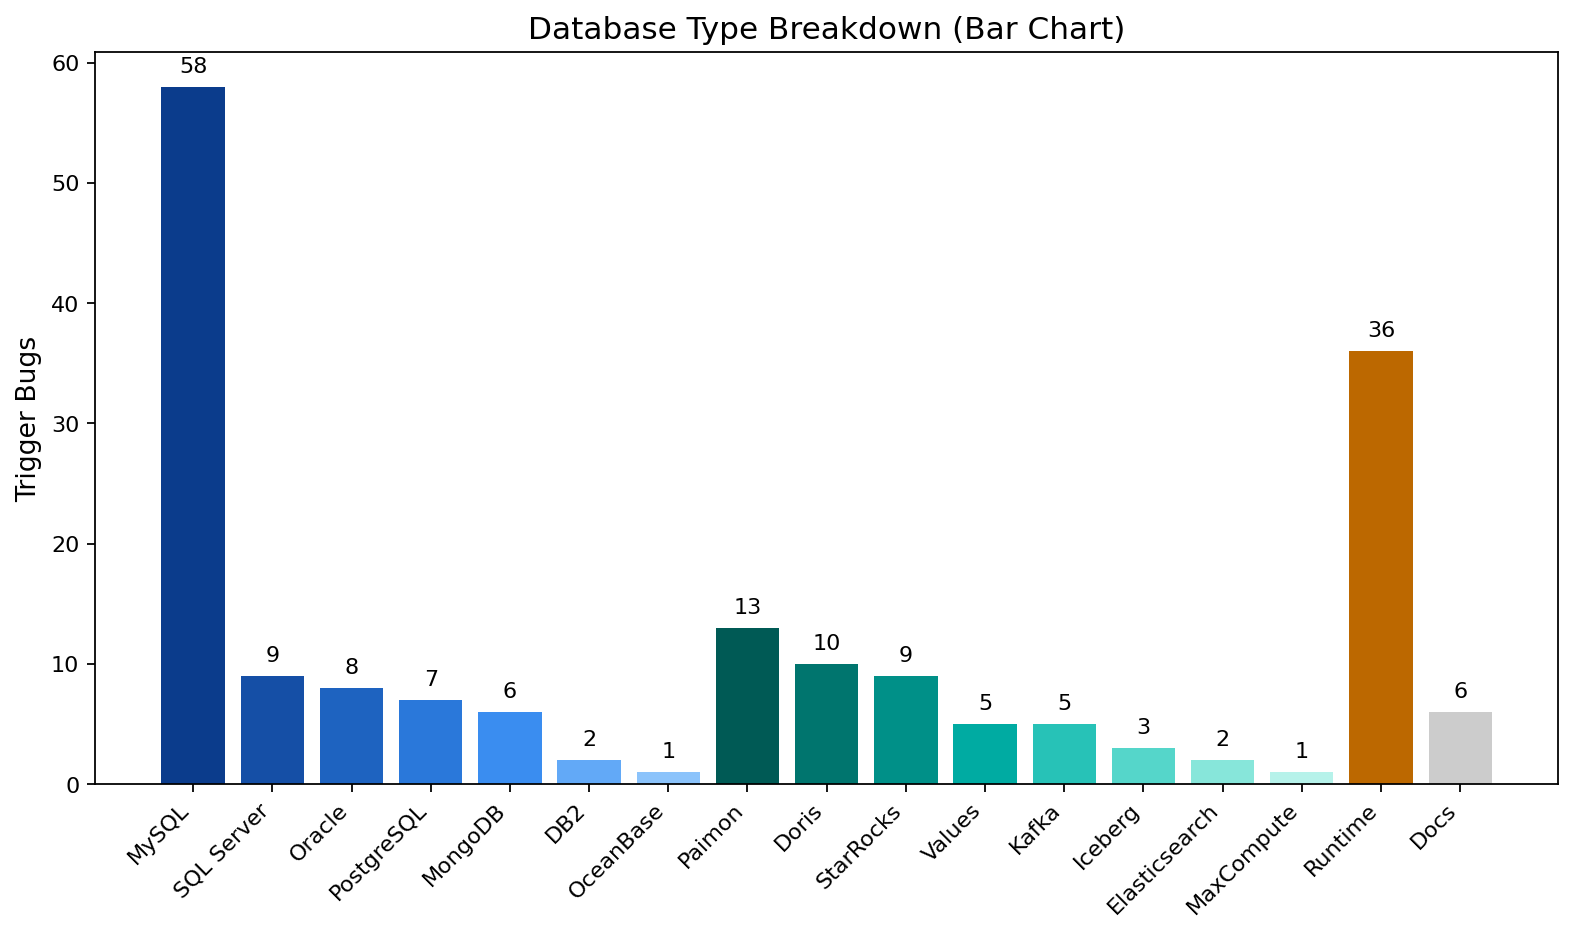

In [16]:
fig1_3, ax1_3 = plt.subplots(figsize=(10,6))
# We reuse: reordered_labels, reordered_values, reordered_colors

# X-axis positions
x_positions = np.arange(len(reordered_labels))

# Draw bars
ax1_3.bar(
    x_positions,
    reordered_values,
    color=reordered_colors,
    # edgecolor="gray",
    linewidth=0.8
)

# Labeling
ax1_3.set_xticks(x_positions)
ax1_3.set_xticklabels(reordered_labels, rotation=45, ha="right")

ax1_3.set_ylabel("Trigger Bugs")
ax1_3.set_title("Database Type Breakdown (Bar Chart)", fontsize=14)

# Adding numeric annotations on top of bars
for i, v in enumerate(reordered_values):
    ax1_3.text(i, v + max(reordered_values)*0.015, 
             str(v),
             ha="center", va="bottom", fontsize=10)

fig1_3.tight_layout()
plt.show()